In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%precision % .4f

import warnings

warnings.filterwarnings('ignore')

### Описание датасета
Сам [датасет](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price)

Описание датасета:
Основные признаки:

- car_ID - идентификатор
- symboling - фактор риска
- CarName - марка машины и ее название
- fueltype - тип горючего
- aspiration - характеристика двигателя (std или turbo)
- doornumber - количество дверей в машине
- carbody - кузов машины
- drivewheel - привод машины (rwd, fwd или 4wd)
- enginelocation - расположение двигателя
- wheelbase - расстояние между колесами
- carlength - длина машины
- carwidth - ширина машины
- carheight - высота машины
- curbweight - вес машины
- enginetype - тип двигателя
- cylindernumber - количество цилиндров в двигателе автомобиля
- enginesize - размер двигателя
- fuelsystem - тип системы впрыска топлива
- boreratio - соотношение диаметра отверстия цилиндра и длины хода поршня
- stroke - длина хода поршня
- compressionratio - соотношение объема цилиндра с поршнем в нижнем положении
- horsepower - количество лошадиных сил
- peakrpm - пиковое число оборотов в минуту
- citympg - количество милей на галлон в городских условиях
- highwaympg - количество милей на галлон на шоссе
- price - цена

Необходимо решить задачу регрессии, предсказать целевой признак `price` по нецелевым.

In [47]:
df = pd.read_csv('../../data/car_price/car_price.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [48]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

В датасете нет пропущенных значений. 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Дополнительно обработаем все признаки, у которых тип данных `object`.
1. `CarName` включает в себя имя компании-произодителя, что может влиять на цену. Отделим его от остального

In [50]:
CompanyName = df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3, "company", CompanyName)
df.drop(columns=['CarName'], inplace=True)
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Есть несколько вариантов написания одной и той же компании, а именно:
- maxda, mazda
- Nissan, nissan
- porsche, porcshce
- toyota, toyouta
- vokswagen, volkswagen, vw

In [51]:
corrections = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

df['company'] = df['company'].replace(corrections)
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Теперь преобразуем это в числовые значения

In [52]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['company'] = label_encoder.fit_transform(df['company'])

In [53]:
df['company'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: company
Non-Null Count  Dtype
--------------  -----
205 non-null    int32
dtypes: int32(1)
memory usage: 948.0 bytes


2. `fueltype` также может влиять, поэтому преобразуем

In [54]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [55]:
df.loc[df['fueltype'] == 'gas', 'fueltype'] = 0
df.loc[df['fueltype'] == 'diesel', 'fueltype'] = 1

3. `aspiration` преобразуем

In [56]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [57]:
df.loc[df['aspiration'] == 'std', 'aspiration'] = 0
df.loc[df['aspiration'] == 'turbo', 'aspiration'] = 1

4. `doornumber`

In [58]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [59]:
df.loc[df['doornumber'] == 'two', 'doornumber'] = 0
df.loc[df['doornumber'] == 'four', 'doornumber'] = 1

5. `carbody`

In [60]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [61]:
df['carbody'] = label_encoder.fit_transform(df['carbody'])

6. `drivewheel`

In [62]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [63]:
df['drivewheel'] = label_encoder.fit_transform(df['drivewheel'])

7. `enginelocation`

In [64]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [65]:
df['enginelocation'] = label_encoder.fit_transform(df['enginelocation'])

8. `enginetype`

In [66]:
df['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

`dohcv` - опечатка

In [67]:
df['enginetype'] = df['enginetype'].replace({'dohcv': 'dohc'})

In [68]:
df['enginetype'] = label_encoder.fit_transform(df['enginetype'])

9. `cylindernumber`

In [69]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [70]:
df.loc[df['cylindernumber'] == 'four', 'cylindernumber'] = 4
df.loc[df['cylindernumber'] == 'six', 'cylindernumber'] = 6
df.loc[df['cylindernumber'] == 'five', 'cylindernumber'] = 5
df.loc[df['cylindernumber'] == 'eight', 'cylindernumber'] = 8
df.loc[df['cylindernumber'] == 'two', 'cylindernumber'] = 2
df.loc[df['cylindernumber'] == 'three', 'cylindernumber'] = 3
df.loc[df['cylindernumber'] == 'twelve', 'cylindernumber'] = 12

In [71]:
df['cylindernumber'].describe()

count     205
unique      7
top         4
freq      159
Name: cylindernumber, dtype: int64

10. `fuelsystem`

In [72]:
df['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

`mfi` - другое написание `mpfi`

In [73]:
df['fuelsystem'] = df['fuelsystem'].replace({'mfi': 'mpfi'})

In [74]:
df['fuelsystem'] = label_encoder.fit_transform(df['fuelsystem'])

In [75]:
df.head()

,car_ID,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,0,0,0,0,2,0,88.6,...,130,4,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,0,0,0,0,2,0,88.6,...,130,4,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,0,0,0,2,2,0,94.5,...,152,4,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,0,0,1,3,1,0,99.8,...,109,4,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,0,0,1,3,0,0,99.4,...,136,4,3.19,3.40,8.0,115,5500,18,22,17450.0


Проверим корреляцию признаков, удалив идентификатор, который не должен ни на что влиять:

In [76]:
df.drop(columns=['car_ID'], inplace=True)

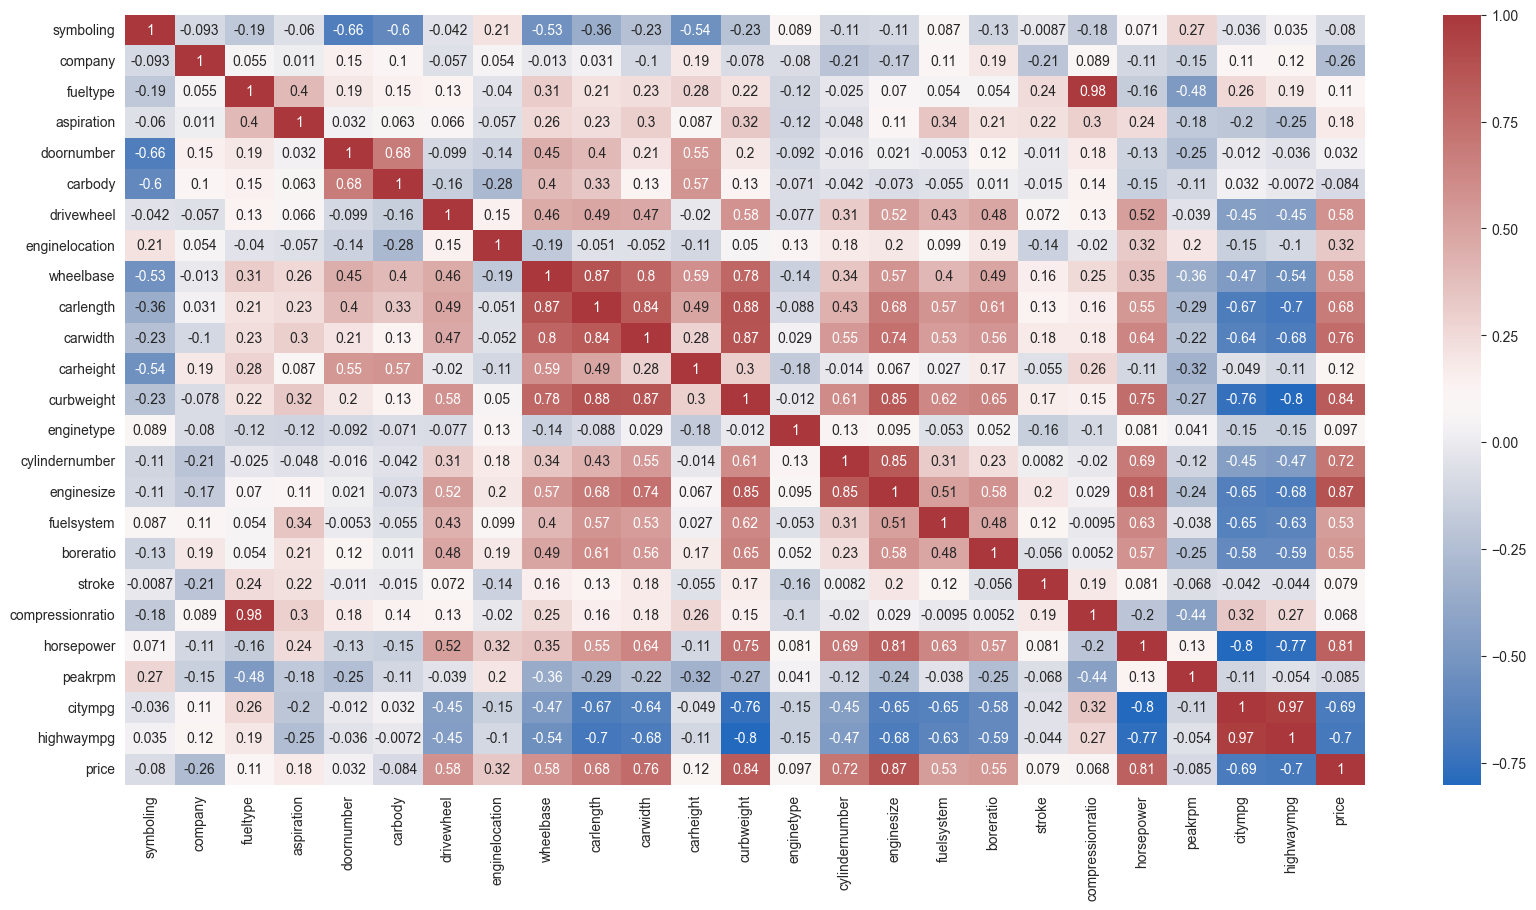

In [77]:
sns.heatmap(df.corr(), annot=True, cmap="vlag")
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

### Реализация линейной регрессии

#### GD (Batch Gradient Descent)

In [78]:
import abc
import numpy.typing as npt
from sklearn.base import BaseEstimator, RegressorMixin


class LinearRegressor(BaseEstimator, RegressorMixin, abc.ABC):
    def __init__(self, alpha=1, max_iter=1000, tol=1e-6):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol

    def _batch(self, X: npt.ArrayLike, y: npt.ArrayLike):
        return X, y

    def fit(self, X: npt.ArrayLike, y: npt.ArrayLike):
        X = np.column_stack([X, np.ones(X.shape[0])])

        coef = np.zeros(X.shape[1])
        grad = np.inf
        self.n_iter = 0
        while self.n_iter < self.max_iter and np.linalg.norm(grad) > self.tol:
            X_, y_ = self._batch(X, y)
            pred = X_ @ coef
            grad = (2 / X_.shape[0]) * X_.T @ (pred - y_) + 2 * self.alpha * np.pad(coef[:-1], (0, 1))
            self.n_iter += 1
            coef -= grad / self.n_iter

        self.coef_ = coef[:-1]
        self.intercept_ = coef[-1]

        return self

    def predict(self, X: npt.ArrayLike):
        return X @ self.coef_ + self.intercept_

#### MBGD (Mini-Batch Gradient Descent)

In [79]:
from sklearn.utils import check_random_state
from math import ceil


class MBGDLinearRegressor(LinearRegressor):
    def __init__(self, alpha=1, batch_size=0.1, max_iter=1000, tol=1e-6, random_state=71):
        super().__init__(alpha, max_iter=max_iter, tol=tol)
        self.batch_size = batch_size
        self.random_state = random_state
        self.random_state_ = check_random_state(random_state)

    def _batch(self, X: npt.ArrayLike, y: npt.ArrayLike):
        size = ceil(len(X) * self.batch_size)
        idx = self.random_state_.randint(len(X), size=size)
        return X[idx, :], y.iloc[idx]

#### SGD (Stochastic Gradient Descent)

In [80]:
class SGDLinearRegressor(MBGDLinearRegressor):
    def __init__(self, alpha=1, max_iter=1000, tol=1e-6, random_state=71):
        super().__init__(alpha, max_iter=max_iter, tol=tol, batch_size=1, random_state=random_state)

### Подбор наилучшего подмножества признаков
Используем Recursive Feature Elimination (RFE) with cross-validation

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV

X, y = df.drop(columns="price"), df["price"]
rfe = RFECV(Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())]),
            importance_getter=lambda m: m.named_steps["ridge"].coef_
            )
rfe.fit(X, y)
for rank, feature in sorted(zip(rfe.ranking_, X.columns)):
    print(rank, feature)
print("Количество наиболее важных признаков: " + str(rfe.n_features_))

1 carwidth
1 company
1 curbweight
1 enginelocation
1 enginesize
1 horsepower
2 wheelbase
3 stroke
4 compressionratio
5 highwaympg
6 citympg
7 peakrpm
8 carbody
9 carheight
10 cylindernumber
11 boreratio
12 drivewheel
13 doornumber
14 enginetype
15 fueltype
16 aspiration
17 fuelsystem
18 carlength
19 symboling
Количество наиболее важных признаков: 6


Оставим только самые важные признаки:

In [82]:
new_df = df[['carwidth', 'company', 'curbweight', 'enginelocation', 'enginesize', 'horsepower']]
new_df.head()

,carwidth,company,curbweight,enginelocation,enginesize,horsepower
0,64.1,0,2548,0,130,111
1,64.1,0,2548,0,130,111
2,65.5,0,2823,0,152,154
3,66.2,1,2337,0,109,102
4,66.4,1,2824,0,136,115


### Обучение

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = new_df, df['price']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

result = []

pd.options.display.float_format = '{:,.2f}'.format
def simple_train(regressor, name):
    regressor.fit(X_train, y_train)

    pred = regressor.predict(X_train)
    mse_train = mean_squared_error(y_train, pred)
    rmse_train = mean_squared_error(y_train, pred, squared=False)
    r2_train = r2_score(y_train, pred)

    pred = regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, pred)
    rmse_test = mean_squared_error(y_test, pred, squared=False)
    r2_test = r2_score(y_test, pred)

    result.append([name, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test])

In [85]:
simple_train(Ridge(random_state=71), "Ridge")
simple_train(LinearRegressor(), "GD")
simple_train(MBGDLinearRegressor(), "MBGD")
simple_train(SGDLinearRegressor(), "SGD")

pd.DataFrame(result, columns=["Estimator", "MSE train", "MSE test", "RMSE train", "RMSE test", "R2 train", "R2 test"])

,Estimator,MSE train,MSE test,RMSE train,RMSE test,R2 train,R2 test
0,Ridge,"6,801,138.96","12,498,980.51","2,607.90","3,535.39",0.89,0.84
1,GD,"10,366,848.40","18,904,332.04","3,219.76","4,347.91",0.83,0.76
2,MBGD,"10,745,088.02","19,418,121.49","3,277.97","4,406.60",0.82,0.75
3,SGD,"10,467,907.23","19,035,445.32","3,235.41","4,362.96",0.82,0.76


#### Подбор гиперпараметров и кросс-валидация

In [86]:
from sklearn.model_selection import GridSearchCV

def smart_train(regressor, name, grid):
    grid_cv = GridSearchCV(
        regressor,
        grid,
        scoring=["neg_mean_squared_error", "neg_root_mean_squared_error", "r2"],
        refit="neg_mean_squared_error",
        return_train_score=True
    )
    grid_cv.fit(X_train, y_train)
    print(name, ": лучшие параметры - ", grid_cv.best_params_)

    result = pd.DataFrame(grid_cv.cv_results_).iloc[grid_cv.best_index_]
    data = []
    index = []
    for function, metric in [
        ("neg_mean_squared_error", "MSE"),
        ("neg_root_mean_squared_error", "RMSE"),
        ("r2", "R2")
    ]:
        for piece in ["train", "test"]:
            row = []
            for i in range(5):
                row.append(result[f"split{i}_{piece}_{function}"])
            row.append(result[f"mean_{piece}_{function}"])
            row.append(result[f"std_{piece}_{function}"])
            data.append(row)
            index.append(f"{metric} {piece}")
    return pd.DataFrame(
        data=data,
        index=index,
        columns=["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Mean", "STD"]
    )

In [87]:
smart_train(Ridge(random_state=71), "Ridge", {"alpha": [0.001, 0, 1, 10, 50], "tol": [1e-6, 1e-5, 1e-4]})

Ridge : лучшие параметры -  {'alpha': 10, 'tol': 1e-06}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE train,"-7,155,157.87","-7,368,060.83","-7,066,912.43","-6,695,259.31","-5,681,597.45","-6,793,397.58","596,933.73"
MSE test,"-6,077,814.98","-4,646,123.40","-5,914,783.87","-7,674,590.17","-13,257,413.11","-7,514,145.11","3,028,445.78"
RMSE train,"-2,674.91","-2,714.42","-2,658.37","-2,587.52","-2,383.61","-2,603.77",117.49
RMSE test,"-2,465.32","-2,155.49","-2,432.03","-2,770.31","-3,641.07","-2,692.84",512.58
R2 train,0.89,0.88,0.89,0.88,0.89,0.89,0.00
R2 test,0.86,0.90,0.85,0.89,0.86,0.87,0.02


In [88]:
smart_train(LinearRegressor(), "GD",
            {"alpha": [0.001, 0, 1, 10], "max_iter": [100, 1000, 5000], "tol": [1e-6, 1e-5, 1e-4]})

GD : лучшие параметры -  {'alpha': 0.001, 'max_iter': 100, 'tol': 1e-06}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE train,"-7,105,678.22","-7,262,909.53","-7,013,290.33","-6,636,241.08","-5,632,811.59","-6,730,186.15","586,172.86"
MSE test,"-5,850,105.30","-5,569,455.19","-6,031,921.65","-7,615,713.03","-12,688,814.93","-7,551,202.02","2,665,651.57"
RMSE train,"-2,665.65","-2,694.98","-2,648.26","-2,576.09","-2,373.35","-2,591.67",115.98
RMSE test,"-2,418.70","-2,359.97","-2,456.00","-2,759.66","-3,562.14","-2,711.29",447.32
R2 train,0.89,0.88,0.89,0.88,0.89,0.89,0.00
R2 test,0.86,0.88,0.85,0.89,0.86,0.87,0.01


In [89]:
smart_train(MBGDLinearRegressor(), "MBGD",
            {"alpha": [0.001, 0, 1, 10], "max_iter": [100, 1000, 5000], "tol": [1e-6, 1e-5, 1e-4]})

MBGD : лучшие параметры -  {'alpha': 1, 'max_iter': 5000, 'tol': 1e-06}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE train,"-10,413,217.28","-11,118,986.77","-10,580,740.91","-10,252,416.67","-9,061,976.58","-10,285,467.64","677,684.76"
MSE test,"-9,299,608.21","-9,047,154.75","-7,568,849.37","-11,587,571.56","-21,733,253.09","-11,847,287.40","5,107,567.21"
RMSE train,"-3,226.95","-3,334.51","-3,252.81","-3,201.94","-3,010.31","-3,205.30",107.19
RMSE test,"-3,049.53","-3,007.85","-2,751.15","-3,404.05","-4,661.89","-3,374.89",676.29
R2 train,0.84,0.82,0.83,0.82,0.82,0.83,0.01
R2 test,0.78,0.81,0.81,0.83,0.77,0.80,0.02


In [90]:
smart_train(SGDLinearRegressor(), "SGD",
            {"alpha": [0.001, 0, 1, 10], "max_iter": [100, 1000, 5000], "tol": [1e-6, 1e-5, 1e-4]})

SGD : лучшие параметры -  {'alpha': 0.001, 'max_iter': 5000, 'tol': 1e-06}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE train,"-7,731,933.39","-8,012,678.15","-8,622,715.53","-7,016,817.60","-5,645,309.48","-7,405,890.83","1,020,409.88"
MSE test,"-5,807,174.67","-4,439,318.53","-10,063,255.59","-8,117,463.43","-13,145,341.66","-8,314,510.78","3,089,909.79"
RMSE train,"-2,780.64","-2,830.67","-2,936.45","-2,648.93","-2,375.99","-2,714.53",192.88
RMSE test,"-2,409.81","-2,106.97","-3,172.26","-2,849.12","-3,625.65","-2,832.76",538.49
R2 train,0.88,0.87,0.86,0.88,0.89,0.88,0.01
R2 test,0.86,0.90,0.75,0.88,0.86,0.85,0.05


### Вывод

1. Все использованные алгоритмы справились с задачей регрессии, предсказывая цену автомобилей.
2. Подбор гиперпараметров значительно увеличил точность предсказания.
3. `Ridge` показал наилучшие результаты с наименьшим значением RMSE test и наивысшим значением R2 test среди всех алгоритмов. Это указывает на более точное предсказание цен автомобилей.
4. Линейная регрессия с градиентным спуском (GD) после подбора гиперпараметров практически сравнялась по точности с Ridge.
5. Мини-пакетный градиентный спуск (MBGD) и стохастический градиентный спуск (SGD) также показали приемлемые результаты, но все же являлись менее точными.